# Visualisierungen in Python mit Matplotlib

--------------
### Aufgabe 1: Nachbilden eines Diagramms in Matplotlib (8 Punkte)
Bilden Sie die unten gezeigte Histogramm in Matplotlib zweimal nach. Verwenden Sie dafür <br>
a) das Matlab-style Interface <br>
b) das Object-oriented Interface

Weitere Hinweise: 
* Die Daten finden Sie in der Datei "DatenHistogramm.txt" im Unterordner "data"
* Das Histogramm hat 30 Bins
* Die horizontale Linie stellt den Durchschnitt aller Bins dar und sollte gestrichelt sein (Tipp: Hierfür benötigen Sie die Rückgabe-Werte der Histogramm-Funktion)
* Die Farbe des Histogramms heißt "lightblue"
* Vergessen Sie Titel und Achsenbeschriftung nicht!

<img src="img/Histogramm.jpg" width = 400>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data Reading
data = pd.read_csv("data/DatenHistogramm.txt", header=None, sep=" ")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       437 non-null    float64
dtypes: float64(1)
memory usage: 3.5 KB


In [3]:
data.head()

,0
0,115.739565
1,112.991488
2,108.267019
3,125.921167
4,90.260678


In [4]:
data.min()

0    52.920623
dtype: float64

In [5]:
data.max()

0    142.016185
dtype: float64

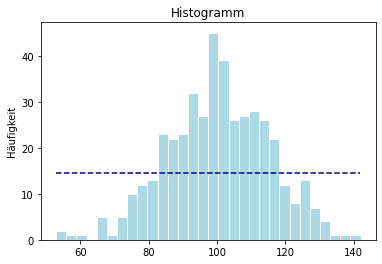

In [6]:
# a) MATLAB Style
result = plt.hist(x=data.to_numpy(), bins=30, color="lightblue", edgecolor="white")
frequency = result[0]
values = result[1]
plt.title("Histogramm")
plt.ylabel("Häufigkeit")

# average-line of frequencies
x = np.arange(values.min(), values.max())
y = np.repeat(frequency.mean(), x.size)
plt.plot(x, y, linestyle="dashed", color="darkblue")

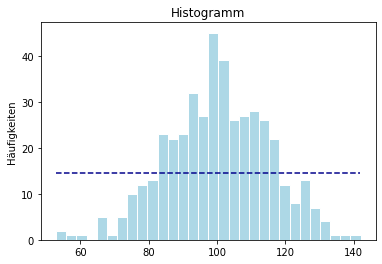

In [7]:
# b) object orientated
figure = plt.figure()
ax = plt.axes()

result = ax.hist(x=data.to_numpy(), bins=30, color="lightblue", edgecolor="white")
frequencies = result[0]
values = result[1]
ax.set_title("Histogramm")
ax.set_ylabel("Häufigkeiten")

# average-line
x = np.arange(values.min(), values.max())
y = np.repeat(frequency.mean(), x.size)
ax.plot(x, y, linestyle="--", color="darkblue")

-------------------------
### Aufgabe 2: Nachbilden eines Diagramms mit Subplots (12 Punkte)

Bilden Sie das unten stehende Diagramm mit Matplotlib nach
Verwendet wird der Datensatz "tips" aus seaborn (siehe unten). 

Die Graphik, die Sie unten sehen, wurde mit Seaborn erzeugt. Ihre Matplotlib-Version muss nicht exakt gleich aussehen. Achten sollten Sie allerdings auf folgende Merkmale: 
* Die beiden Teilgraphiken sollten vom Seitenverhältnis her in etwa quadratisch sein
* Beide Teilgraphiken sollten eine Überschrift haben
* Die Achsenbegrenzungen sollten bei beiden Teilgraphiken gleich sein
* Und natürlich müssen die richtigen Daten geplottet sein und es sollte nach dem  Attribut "time" eingefärbt werden. 

Einige Punkte sind reserviert für folgende weitere Details:
* Verwendung derselben Farben in Matplotlib wie im Screenshot (bei Matplotlib heißen die verwendeten Farben "tab:orange", "tab:blue")
* Anzeigen einer Legende für die Farben (muss nicht am gleichen Platz stehen)
* Keine y-Achsenbeschriftung bei der 2. Teilgraphik, aber dafür ein kompaktes Layout (d.h. beide Graphiken eng zusammen)
* Weiß als Rahmenfarbe für die Marker

<img src = "./img/Subplots2.jpg" width = 800>

In [8]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
type(tips)

pandas.core.frame.DataFrame

In [10]:
# 1x Male Dataset + 1x Female Dataset
df_male = tips[tips.sex == "Male"]
df_female = tips[tips.sex == "Female"]

df_male.sex.value_counts()

Male      157
Female      0
Name: sex, dtype: int64

In [11]:
df_female.sex.value_counts()

Female    87
Male       0
Name: sex, dtype: int64

In [16]:
# 1x Male&Lunch Dataset + 1x Male&Dinner Dataset
df_male_lunch = df_male[df_male.time == "Lunch"]
df_male_dinner = df_male[df_male.time == "Dinner"]

print("Male Lunch:\n", df_male_lunch.time.value_counts())
print("\nMale Dinner:\n", df_male_dinner.time.value_counts())

# 1x Female&Lunch Dataset + 1x Female&Dinner Dataset
df_female_lunch = df_female[df_female.time == "Lunch"]
df_female_dinner = df_female[df_female.time == "Dinner"]

print("\n--------\nFemale Lunch:\n", df_female_lunch.time.value_counts())
print("\nFemale Dinner:\n", df_female_dinner.time.value_counts())

Male Lunch:
 Lunch     33
Dinner     0
Name: time, dtype: int64

Male Dinner:
 Dinner    124
Lunch       0
Name: time, dtype: int64

--------
Female Lunch:
 Lunch     35
Dinner     0
Name: time, dtype: int64

Female Dinner:
 Dinner    52
Lunch      0
Name: time, dtype: int64


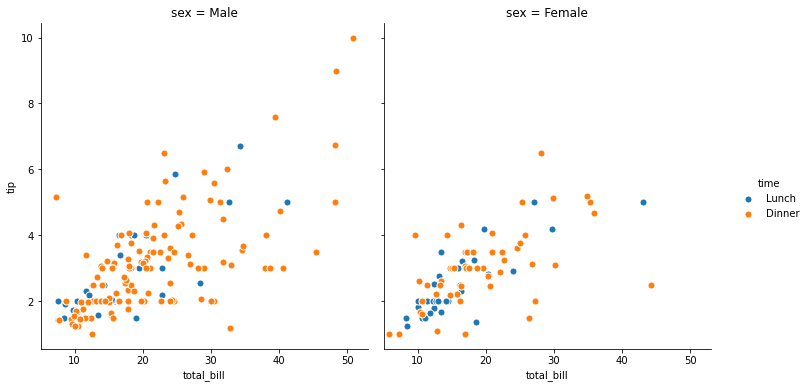

In [134]:
figure, ax = plt.subplots(1, 2)

figure.set_size_inches(12, 6)
#figure.tight_layout()

### draw Male Dataset -> with white edge and the size is a little bigger (50)
# lunch -> blue color
ax[0].scatter(df_male_lunch.total_bill, df_male_lunch.tip, c="tab:blue", edgecolor="white", s=50)
# dinner -> orange color
ax[0].scatter(df_male_dinner.total_bill, df_male_dinner.tip, c="tab:orange", edgecolor="white", s=50)
# deactivate the top and right axis
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
# set title and labels
ax[0].set_xlabel("total_bill")
ax[0].set_ylabel("tip")
ax[0].set_title("sex = Male")

### draw Female Dataset -> with white edge and the size is a little bigger (50)
# lunch -> blue color
scatter1 = ax[1].scatter(df_female_lunch.total_bill, df_female_lunch.tip, c="tab:blue", edgecolor="white", s=50)
# dinner -> orange color
scatter2 = ax[1].scatter(df_female_dinner.total_bill, df_female_dinner.tip, c="tab:orange", edgecolor="white", s=50)
# deactivate the top and right axis
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
# set title and label
ax[1].set_xlabel("total_bill")
ax[1].set_title("sex = Female")
# fit axis
ax[1].set_yticks(ticks=np.arange(2, 11, step=2))
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylim(ax[0].get_ylim())
# disappear y-axis-label-names
ax[1].set_yticklabels([" "]*5)
# adding legend -> with title, another position and without the box
#                                 -> positioning is with bbox_to_anchor very easy
ax[1].legend(handles=[scatter1, scatter2], labels=['Lunch', 'Dinner'], title="time", bbox_to_anchor=(1.3, 0.55), frameon=False)

# reduce spacing
plt.subplots_adjust(wspace=0.05)
plt.show()